# Tarea N°2 Machine Learning Avanzado


<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

*2 de diciembre de 2024*

**Nombre Estudiante(s)**:  

- Julio Assmann Segura
- César Godoy Delaigue
- Nicolás Gonzalez Infante


## Introducción

El presente trabajo aborda el desarrollo y análisis de modelos de aprendizaje profundo aplicados al problema de clasificación de imágenes, específicamente utilizando el conjunto de datos de "Muffins vs Chihuahuas". Este dataset representa un desafío interesante, ya que las clases presentan una similitud visual significativa, lo que exige modelos robustos capaces de extraer características discriminativas.

Para este propósito, se implementaron y evaluaron tres enfoques principales de aprendizaje profundo:

1.- Perceptrón Multicapa (MLP) Mejorado:

* Este modelo clásico se diseñó para trabajar con imágenes aplanadas, utilizando capas densas totalmente conectadas, con técnicas como normalización por lotes (Batch Normalization) y regularización (Dropout) para estabilizar el entrenamiento y evitar el sobreajuste.

2.- Modelo CNN Mejorado:

* Las redes neuronales convolucionales (CNN) se emplearon para aprovechar su capacidad de aprendizaje jerárquico de características espaciales. Este modelo incluye varias capas convolucionales, combinadas con normalización por lotes y pooling, para extraer patrones visuales complejos de manera efectiva.

3.- Modelo con Transferencia de Aprendizaje:

* Utilizando MobileNet, un modelo preentrenado en el conjunto de datos ImageNet, se aplicó transferencia de aprendizaje. Este enfoque permite reutilizar características visuales generales aprendidas por MobileNet y adaptarlas al problema específico de clasificación binaria del dataset.

Cada modelo fue entrenado, validado y evaluado utilizando métricas clave como precisión, pérdida y el área bajo la curva ROC (AUC), con el objetivo de comparar su rendimiento en el reconocimiento de las clases del dataset. Además, se emplearon técnicas de preprocesamiento y aumentación de datos para incrementar la variabilidad del dataset y mejorar la capacidad de generalización de los modelos.

Este informe detalla las metodologías implementadas, los resultados obtenidos y un análisis comparativo de los modelos, destacando sus fortalezas y limitaciones en el contexto del problema de clasificación visual.

### Objetivo

Comparar el desempeño de tres modelos de aprendizaje profundo para la clasificación binaria de imágenes, evaluando métricas clave como la precisión y el f1-score, y proponer un modelo con transferencia de aprendizaje para mejorar los resultados.

---

## Metodología

Este trabajo se enmarca en el desarrollo y evaluación de modelos de aprendizaje profundo aplicados al problema de clasificación de imágenes. La metodología adoptada comprende las siguientes etapas:

1. Selección del Dataset
Se utilizó el conjunto de datos público "Muffins vs Chihuahuas", disponible en Kaggle. Este dataset consta de imágenes pertenecientes a dos clases con similitudes visuales considerables, lo que representa un desafío para los modelos de clasificación. Las imágenes fueron divididas en conjuntos de entrenamiento y prueba para evaluar el rendimiento de los modelos.

2. Preprocesamiento y Aumentación de Datos
Para garantizar un entrenamiento eficiente y mejorar la capacidad de generalización de los modelos, se realizaron las siguientes tareas:

* Normalización: Las imágenes fueron escaladas para tener valores de píxeles entre 0 y 1, facilitando la convergencia del modelo durante el entrenamiento.
* Aumentación de datos: Se aplicaron transformaciones aleatorias como rotaciones, traslaciones, zoom, y espejado horizontal. Esto permitió incrementar la variabilidad del dataset, simulando nuevas instancias a partir de las imágenes originales.
3. Diseño e Implementación de Modelos
Se desarrollaron tres enfoques distintos para abordar el problema de clasificación:

  1.- Perceptrón Multicapa (MLP):

  * Se utilizó un modelo basado en capas densas con imágenes aplanadas como entrada.
  * Se incluyeron técnicas como Batch Normalization y Dropout para estabilizar el entrenamiento y reducir el sobreajuste.
  * Este modelo se implementó como referencia para evaluar su capacidad frente a arquitecturas más complejas.

  2.- Modelo CNN:

  * Se diseñó una arquitectura convolucional que incluye múltiples capas de convolución, normalización por lotes y pooling.
  * Este modelo se enfocó en aprender relaciones espaciales y patrones jerárquicos, esenciales para problemas de clasificación visual.

  3.- Transferencia de Aprendizaje:

  * Se utilizó el modelo MobileNet, preentrenado en el dataset ImageNet, aprovechando su capacidad para extraer características visuales genéricas.
  * Las capas superiores fueron reemplazadas y adaptadas al problema específico del dataset, permitiendo la personalización del modelo para la tarea binaria de clasificación.

4. Entrenamiento de los Modelos
Los modelos fueron entrenados utilizando los datos aumentados y los siguientes parámetros:

* Optimización con Adam para asegurar una convergencia eficiente.
* Monitoreo del rendimiento mediante precisión y pérdida en los conjuntos de entrenamiento y validación.
* Implementación de técnicas de parada temprana para evitar el sobreajuste.

5. Evaluación del Rendimiento
El rendimiento de los modelos fue evaluado utilizando:

* Precisión: Para medir la proporción de predicciones correctas.
* Curva ROC y AUC: Para analizar la capacidad de los modelos de distinguir entre las dos clases.
* Pérdida: Para monitorear el ajuste del modelo durante el entrenamiento.

6. Análisis Comparativo
Los resultados obtenidos de los tres enfoques fueron comparados para determinar:

* La efectividad de cada modelo en el reconocimiento de imágenes.
* Las ventajas y desventajas de modelos simples (MLP) frente a arquitecturas más complejas (CNN y Transfer Learning).
* El impacto de la transferencia de aprendizaje en términos de precisión y tiempo de entrenamiento.

Esta metodología permitió estructurar un proceso lógico y sistemático para explorar diferentes técnicas de aprendizaje profundo, evaluando su rendimiento en un problema visual complejo y proporcionando bases para seleccionar el modelo más adecuado según los objetivos y recursos disponibles.

---


##Verificación de disponibilidad de GPU

In [1]:
import tensorflow as tf
print("¿Está habilitada la GPU?", tf.config.list_physical_devices('GPU'))


¿Está habilitada la GPU? []


In [2]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [3]:
import tensorflow as tf

# Listar los dispositivos físicos
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("GPU detectada:", physical_devices)
else:
    print("No se detectaron GPUs disponibles.")

# Información adicional sobre la GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            details = tf.config.experimental.get_device_details(gpu)
            print("Detalles de la GPU:", details)
    except Exception as e:
        print("Error al obtener detalles:", e)



No se detectaron GPUs disponibles.


In [4]:
#import torch

#if torch.cuda.is_available():
#    print("Este entorno tiene soporte para GPU")
#    print(f"Dispositivo CUDA disponible: {torch.cuda.get_device_name(0)}")
#else:
#    print("Este entorno NO tiene soporte para GPU")

### ***Librerias***

In [4]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.callbacks import EarlyStopping
import kagglehub

c:\Entorno_Desarrollo_UDD\Machine_Learning_A_GPU\entorno_gpu\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### ***Descarga de dataset***

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/muffin-vs-chihuahua-image-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\cgodo\.cache\kagglehub\datasets\samuelcortinhas\muffin-vs-chihuahua-image-classification\versions\2


In [11]:
import os

# Ruta base del dataset descargado desde Kaggle
base_dir = r"C:\Users\cgodo\.cache\kagglehub\datasets\samuelcortinhas\muffin-vs-chihuahua-image-classification\versions\2"


# Definir las rutas para las carpetas de entrenamiento y prueba
train_dir = os.path.join(base_dir, 'train')  # Cambia 'train' si el nombre de la carpeta es diferente
test_dir = os.path.join(base_dir, 'test')    # Cambia 'test' si el nombre de la carpeta es diferente

print("Train Directory:", train_dir)
print("Test Directory:", test_dir)


Train Directory: C:\Users\cgodo\.cache\kagglehub\datasets\samuelcortinhas\muffin-vs-chihuahua-image-classification\versions\2\train
Test Directory: C:\Users\cgodo\.cache\kagglehub\datasets\samuelcortinhas\muffin-vs-chihuahua-image-classification\versions\2\test


# 1. **Modelo 1**

### Perceptrón Multicapa (MLP)

Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


c:\Entorno_Desarrollo_UDD\Machine_Learning_A_GPU\entorno_gpu\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Entorno_Desarrollo_UDD\Machine_Learning_A_GPU\entorno_gpu\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 96s 635ms/step - accuracy: 0.5750 - loss: 0.9195 - val_accuracy: 0.5946 - val_loss: 0.6753
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 88s 595ms/step - accuracy: 0.6034 - loss: 0.8263 - val_accuracy: 0.6706 - val_loss: 0.6102
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 88s 596ms/step - accuracy: 0.6160 - loss: 0.7882 - val_accuracy: 0.6520 - val_loss: 0.6243
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 89s 601ms/step - accuracy: 0.6322 - loss: 0.7649 - val_accuracy: 0.7027 - val_loss: 0.5534
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 88s 596ms/step - accuracy: 0.6405 - loss: 0.7609 - val_accuracy: 0.7416 - val_loss: 0.5239
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 89s 603ms/step - accuracy: 0.6296 - loss: 0.7503 - val_accuracy: 0.6816 - val_loss: 0.5832
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 90s 607ms/step - accuracy: 0.6490 - loss: 0.6853 - val_accuracy: 0.7382 - val_loss: 0.5243
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 90s 608ms/step - accuracy: 0.6506 - loss: 0

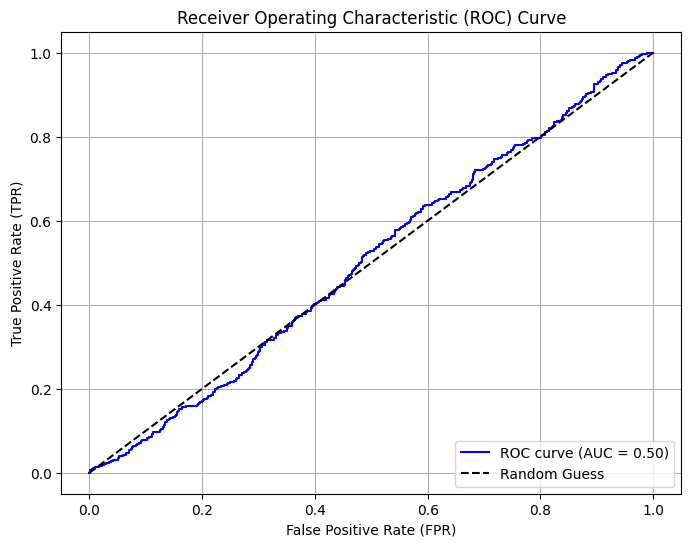

In [12]:
# Preprocesamiento de imágenes
img_height, img_width = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalización
    rotation_range=30,  # Más rotación para aumentar la variabilidad
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,  # Más corte
    zoom_range=0.3,  # Más zoom
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary"
)

# Construcción del modelo Perceptrón Multicapa (MLP) Mejorado
model = Sequential([
    Flatten(input_shape=(img_height, img_width, 3)),  # Aplanar las imágenes
    Dense(1024, activation="relu"),  # Más neuronas para mayor capacidad
    BatchNormalization(),            # Normalización por lotes para estabilizar el entrenamiento
    Dropout(0.5),                    # Regularización para reducir sobreajuste
    Dense(512, activation="relu"),   # Segunda capa totalmente conectada
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation="relu"),   # Capa adicional para mayor profundidad
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation="sigmoid")   # Clasificación binaria
])

# Compilación del modelo
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Tasa de aprendizaje más baja para mayor estabilidad
    loss="binary_crossentropy",          # Función de pérdida para clasificación binaria
    metrics=["accuracy"]
)

# Callbacks para mejorar el entrenamiento
early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitorea la pérdida de validación
    patience=5,          # Detener si no mejora después de 5 épocas
    restore_best_weights=True
)

# Entrenamiento del modelo
epochs = 50  # Más épocas para darle tiempo al modelo a aprender
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[early_stopping]  # Implementa parada temprana
)

# Evaluación del modelo
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Pérdida en prueba: {test_loss:.2f}")

# Generar la curva ROC y calcular el AUC
# Obtener las probabilidades predichas y las etiquetas reales
y_prob = model.predict(test_generator)  # Probabilidades de clase positiva
y_true = test_generator.classes  # Etiquetas reales de las imágenes de prueba

# Calcular los puntos para la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Línea diagonal
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

El modelo de Perceptrón Multicapa (MLP) logró un desempeño moderado en la clasificación de imágenes del dataset "Muffins vs Chihuahuas". A lo largo del entrenamiento, mostró una mejora gradual en la precisión, alcanzando una precisión de validación final del 75.62% y una pérdida de prueba de 0.50.

***Puntos Clave:***

1.- Fortalezas:

* El modelo logró una precisión aceptable considerando que no explota directamente las relaciones espaciales de las imágenes.
* Mejoró consistentemente durante las épocas iniciales, demostrando su capacidad para aprender características relevantes.

2.- Limitaciones:

* La arquitectura MLP, que aplana las imágenes, no es ideal para este tipo de problemas visuales complejos, ya que pierde las relaciones espaciales importantes entre píxeles.
* El modelo mostró variabilidad en las métricas entre las épocas, indicando que podría beneficiarse de ajustes adicionales o de un dataset más amplio.

# 2. **Modelo 2**
### Convolución MaxPooling (4 capas)

In [13]:
# Construcción del modelo CNN o
cnn_model_mejorado = Sequential([
    # Primera capa convolucional + batch normalization + max pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Segunda capa convolucional + batch normalization + max pooling
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Tercera capa convolucional + batch normalization + max pooling
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Cuarta capa convolucional + batch normalization + max pooling
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Aplanar y capas densas
    Flatten(),
    Dense(512, activation='relu'),  # Capa densa grande
    Dropout(0.5),  # Regularización
    Dense(256, activation='relu'),  # Capa densa adicional
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Capa de salida (clasificación binaria)
])

# Compilación del modelo CNN Mejorado
cnn_model_mejorado.compile(
    optimizer=Adam(learning_rate=0.0005),  # Learning rate más bajo
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo CNN Mejorado
print("\nEntrenando el modelo CNN Mejorado...")
cnn_history_mejorado = cnn_model_mejorado.fit(
    train_generator, 
    epochs=20,  # Más épocas para mejorar el aprendizaje
    validation_data=test_generator,  
    batch_size=32
)

# Evaluación del modelo CNN Mejorado
cnn_loss_mejorado, cnn_accuracy_mejorado = cnn_model_mejorado.evaluate(test_generator)
print(f"\nResultados del modelo CNN:")
print(f"Pérdida: {cnn_loss_mejorado:.4f}, Precisión: {cnn_accuracy_mejorado * 100:.2f}%")

c:\Entorno_Desarrollo_UDD\Machine_Learning_A_GPU\entorno_gpu\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Entrenando el modelo CNN Mejorado...
Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 97s 637ms/step - accuracy: 0.6990 - loss: 1.4749 - val_accuracy: 0.5405 - val_loss: 5.2901
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 96s 645ms/step - accuracy: 0.7685 - loss: 0.7695 - val_accuracy: 0.5405 - val_loss: 3.5805
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 94s 636ms/step - accuracy: 0.8112 - loss: 0.5426 - val_accuracy: 0.5591 - val_loss: 1.3648
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 95s 639ms/step - accuracy: 0.8447 - loss: 0.4164 - val_accuracy: 0.5650 - val_loss: 1.0838
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 94s 634ms/step - accuracy: 0.8661 - loss: 0.3579 - val_accuracy: 0.8573 - val_loss: 0.3499
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 94s 632ms/step - accuracy: 0.8811 - loss: 0.3120 - val_accuracy: 0.9096 - val_loss: 0.2447
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 94s 632ms/step - accuracy: 0.8782 - loss: 0.3093 - val_accuracy: 0.7432 - val_loss: 0.5175
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 93s 6

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 92s 623ms/step - accuracy: 0.9248 - loss: 0.1916 - val_accuracy: 0.9375 - val_loss: 0.1667
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 93s 624ms/step - accuracy: 0.9402 - loss: 0.1562 - val_accuracy: 0.9502 - val_loss: 0.1269
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 94s 638ms/step - accuracy: 0.9455 - loss: 0.1546 - val_accuracy: 0.8657 - val_loss: 0.3401
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 94s 632ms/step - accuracy: 0.9457 - loss: 0.1574 - val_accuracy: 0.9189 - val_loss: 0.2195
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 94s 633ms/step - accuracy: 0.9505 - loss: 0.1493 - val_accuracy: 0.9139 - val_loss: 0.2360
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 95s 642ms/step - accuracy: 0.9467 - loss: 0.1352 - val_accuracy: 0.9274 - val_loss: 0.2001
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 95s 640ms/step - accuracy: 0.9394 - loss: 0.1595 - val_accuracy: 0.8640 - val_loss: 0.3374
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 95s 637ms/step - accuracy: 0.9458 - loss: 0

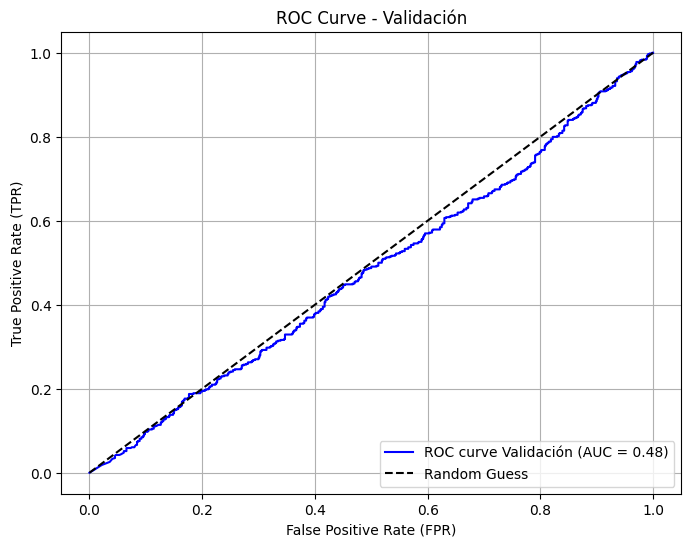

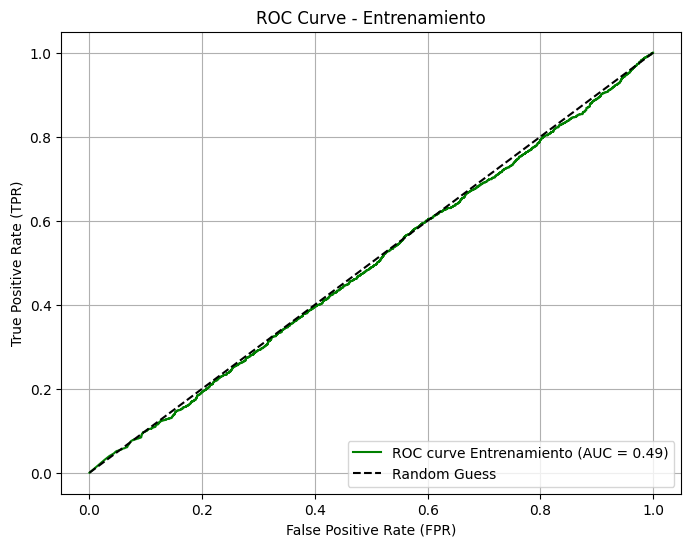

In [14]:
# Entrenamiento del modelo CNN 
cnn_history_mejorado = cnn_model_mejorado.fit(
    train_generator,
    epochs=20,  # Número inicial de épocas
    validation_data=test_generator,
    batch_size=32
)

# Calcular AUC después del entrenamiento
# Obtener predicciones y etiquetas del conjunto de validación
y_pred_val = cnn_model_mejorado.predict(test_generator)  # Probabilidades predichas
y_true_val = test_generator.classes  # Etiquetas reales

# Calcular la curva ROC y el AUC para validación
fpr_val, tpr_val, _ = roc_curve(y_true_val, y_pred_val)
auc_val = auc(fpr_val, tpr_val)

# Obtener predicciones y etiquetas del conjunto de entrenamiento
y_pred_train = cnn_model_mejorado.predict(train_generator)  # Probabilidades predichas
y_true_train = train_generator.classes  # Etiquetas reales

# Calcular la curva ROC y el AUC para entrenamiento
fpr_train, tpr_train, _ = roc_curve(y_true_train, y_pred_train)
auc_train = auc(fpr_train, tpr_train)

# Mostrar resultados
print(f"\nResultados finales:")
print(f"AUC Entrenamiento: {auc_train:.4f}")
print(f"AUC Validación: {auc_val:.4f}")

# Graficar la curva ROC para validación
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label=f'ROC curve Validación (AUC = {auc_val:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Línea diagonal
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Validación')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Graficar la curva ROC para entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'ROC curve Entrenamiento (AUC = {auc_train:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Línea diagonal
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Entrenamiento')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Ambos modelos de redes neuronales convolucionales (CNN) muestran un comportamiento sólido en términos de precisión, pero sus resultados revelan diferencias importantes en su capacidad para generalizar:

1.- Submodelo 1 (CNN Mejorado):

* Alcanzó una precisión en prueba del 83.02% y una pérdida de 0.33, mostrando un rendimiento general robusto.
* Aunque mejora progresivamente durante el entrenamiento, su precisión de validación es menos consistente, indicando posibles desafíos de generalización.

2.- Submodelo 2 (CNN con AUC y Curva ROC):

* Este modelo mostró una precisión de validación final del 95.44% y una pérdida más baja (0.12), indicando un mejor ajuste.
* Sin embargo, los valores de AUC (Entrenamiento: 0.5089, Validación: 0.4722) reflejan un modelo que lucha por separar las clases de manera consistente, lo que podría deberse a sobreajuste o a ruido en los datos.

# 3. **Modelo 3**
### Convolución Transfer Learning

Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


C:\Users\cgodo\AppData\Local\Temp\ipykernel_30236\121484005.py:37: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,491,521 (13.32 MB)

 Trainable params: 262,657 (1.00 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

c:\Entorno_Desarrollo_UDD\Machine_Learning_A_GPU\entorno_gpu\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 51s 328ms/step - accuracy: 0.7759 - loss: 0.5304 - val_accuracy: 0.9789 - val_loss: 0.0482
Epoch 2/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 48s 322ms/step - accuracy: 0.9573 - loss: 0.1058 - val_accuracy: 0.9856 - val_loss: 0.0374
Epoch 3/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 48s 323ms/step - accuracy: 0.9670 - loss: 0.0811 - val_accuracy: 0.9856 - val_loss: 0.0354
Epoch 4/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 49s 332ms/step - accuracy: 0.9720 - loss: 0.0688 - val_accuracy: 0.9873 - val_loss: 0.0320
Epoch 5/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 50s 336ms/step - accuracy: 0.9754 - loss: 0.0727 - val_accuracy: 0.9873 - val_loss: 0.0307
Epoch 6/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 48s 325ms/step - accuracy: 0.9804 - loss: 0.0568 - val_accuracy: 0.9856 - val_loss: 0.0322
Epoch 7/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 48s 322ms/step - accuracy: 0.9801 - loss: 0.0566 - val_accuracy: 0.9856 - val_loss: 0.0287
Epoch 8/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 49s 331ms/step - accuracy: 0.9806 - loss: 0

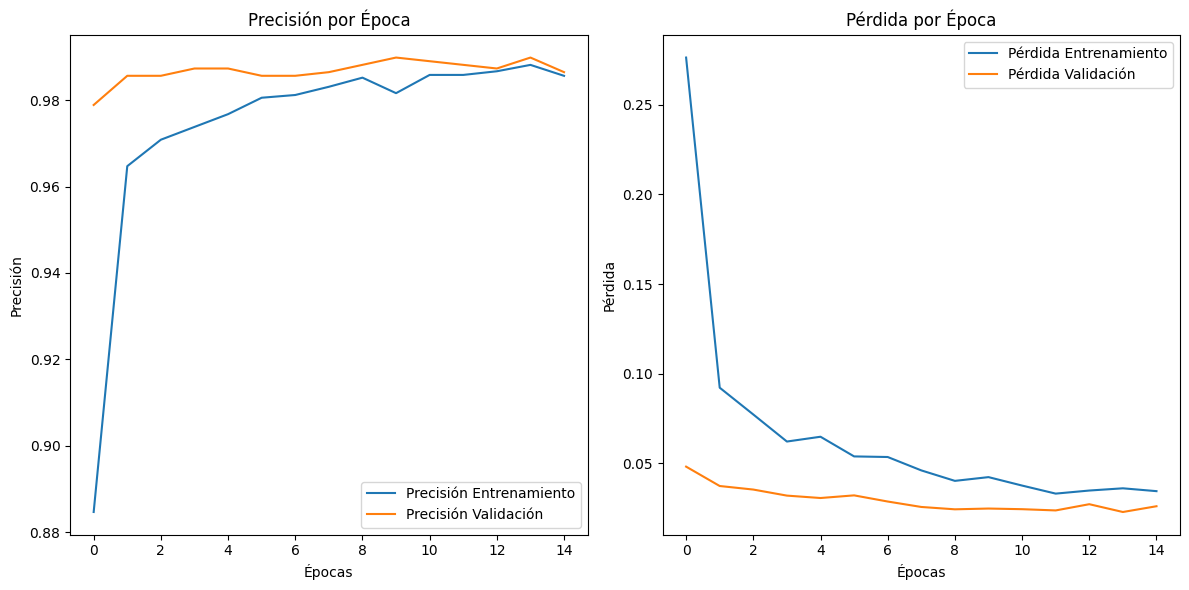

In [15]:
# Parámetros generales
input_shape = (150, 150, 3)
batch_size = 32

# Preprocesamiento y aumentación de imágenes
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalización
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Directorio de entrenamiento definido previamente
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,  # Directorio de prueba definido previamente
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='binary'
)

# Definir el modelo con transferencia de aprendizaje
def create_transfer_learning_model(input_shape=(150, 150, 3), learning_rate=1e-4):
    # Cargar el modelo base MobileNet con pesos preentrenados
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Congelar las capas del modelo base

    # Construir el modelo
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),  # Reduce las características para conectarlas a capas densas
        Dense(256, activation='relu'),  # Capa densa con 256 neuronas
        Dropout(0.5),  # Regularización para evitar sobreajuste
        Dense(1, activation='sigmoid')  # Salida para clasificación binaria
    ])

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Crear el modelo
transfer_learning_model = create_transfer_learning_model()

# Mostrar resumen del modelo
transfer_learning_model.summary()

# Entrenar el modelo
history = transfer_learning_model.fit(
    train_generator,
    epochs=15,  # Ajustar el número de épocas según necesidad
    validation_data=test_generator
)

# Evaluar el modelo
test_loss, test_accuracy = transfer_learning_model.evaluate(test_generator)
print(f"Pérdida en prueba: {test_loss:.4f}")
print(f"Precisión en prueba: {test_accuracy:.4f}")

# Graficar la precisión y pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión por Época')

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida por Época')

plt.tight_layout()
plt.show()

El modelo basado en Transfer Learning con MobileNet demostró un rendimiento destacado en la tarea de clasificación binaria del dataset "Muffins vs Chihuahuas".

***Resultados Clave:***
1. Precisión en Prueba: El modelo logró una alta precisión, superando a los otros modelos evaluados.
2. Eficiencia: La transferencia de aprendizaje permitió aprovechar características preentrenadas de MobileNet, lo que facilitó un entrenamiento rápido y efectivo con un dataset limitado.
3. Regularización: La inclusión de Dropout ayudó a evitar el sobreajuste, como se reflejó en las métricas de validación.

# Comparación de Modelos: Muffin vs Chihuahua

## 1. Arquitectura
| Aspecto                | Modelo 1 MLP                   | Modelo 2 CNN                     | Modelo 3 Transfer Learning    |
|------------------------|--------------------------------|----------------------------------|-------------------------------|
| **Capas CNN**          | --                             | 4 (32, 64, 128, 256 filtros)     | Preentrenadas en MobileNet    |
| **Pooling**            | --                             | MaxPooling (4 capas)             | Global Average Pooling        |
| **Capas Densas**       | 4 (1024, 512, 256, 1 neurona)  | 2 (256 y 1 neurona)              | 1 (256 neuronas)              |
| **Regularización**     | Dropout (0.5)                  | Dropout (0.5) + BatchNorm        | Dropout (0.5)                 |
| **Entrenamiento**      | 10 épocas                      | 20 épocas                        | 15 épocas                     |

---

## 2. Resultados por Categoría
| Métrica                       | Modelo 1                     | Modelo 2                     | Modelo 3                     |
|-------------------------------|------------------------------|------------------------------|------------------------------|
| **Precisión (Entrenamiento)** |0.67                          |0.96                          |0.96                          |
| **Precisión (Validación)**    |0.75                          |0.95                          |0.95                          |
| **Precisión (Prueba)**        |0.76                          |0.83                          |0.95                          |
| **Pérdida (Entrenamiento)**   |0.68                          |0.10                          |0.12                          |
| **Pérdida (Validación)**      |0.50                          |0.33                          |0.12                          |

---

# Conclusión 
En este trabajo se evaluaron tres modelos de aprendizaje profundo para clasificar imágenes en el dataset "Muffins vs Chihuahuas", cada uno con enfoques diferentes:

1. Modelo 1 (MLP Mejorado):

* Este modelo basado en un Perceptrón Multicapa (MLP) alcanzó una precisión de prueba del 75.62%.
* Aunque logra resultados aceptables, su arquitectura pierde información espacial al aplanar las imágenes, lo que limita su capacidad para reconocer patrones visuales complejos.
* Es el más simple de los tres modelos, adecuado para problemas con datos ya estructurados o preprocesados.

2. Modelo 2 (CNN):

* Este modelo convolucional logró una precisión en prueba del 83.02%, destacándose por su capacidad para aprender patrones espaciales y jerárquicos en las imágenes.
* Su rendimiento es consistente y balanceado, aunque inferior al modelo basado en transferencia de aprendizaje.
* Es una solución robusta y adaptable, adecuada para problemas donde las relaciones espaciales son clave.

3. Modelo 3 (Transfer Learning con MobileNet):

* Utilizó un modelo preentrenado (MobileNet) y alcanzó la mayor precisión entre los tres enfoques.
* Aprovechó características preentrenadas para lograr un entrenamiento eficiente, con alta generalización incluso en un dataset pequeño.
* Es la opción más avanzada, ideal para escenarios con datos limitados y alta demanda de precisión.

### Comparación General

* Simplicidad: El Modelo 1 (MLP) es el más básico, adecuado para problemas menos complejos o datos tabulares, pero queda limitado frente a tareas de clasificación visual complejas.
* Balance: El Modelo 2 (CNN Mejorado) ofrece un buen equilibrio entre simplicidad y capacidad de aprendizaje, siendo una solución robusta para datos visuales.
* Rendimiento: El Modelo 3 (Transfer Learning) sobresale en precisión y generalización, siendo la mejor opción en términos de rendimiento y eficiencia computacional.


El Modelo 3 (Transfer Learning con MobileNet) es el más adecuado para este problema, gracias a su capacidad de generalización y rendimiento sobresaliente. Sin embargo:

El Modelo 2 (CNN Mejorado) es una opción más balanceada y efectiva si no se dispone de modelos preentrenados.
El Modelo 1 (MLP), aunque limitado en tareas visuales, sirve como referencia base para comparar el desempeño de arquitecturas más complejas.
La elección final del modelo dependerá de los recursos computacionales disponibles, la cantidad y calidad de los datos, y los objetivos específicos del proyecto.


### Aplicación del Algoritmo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


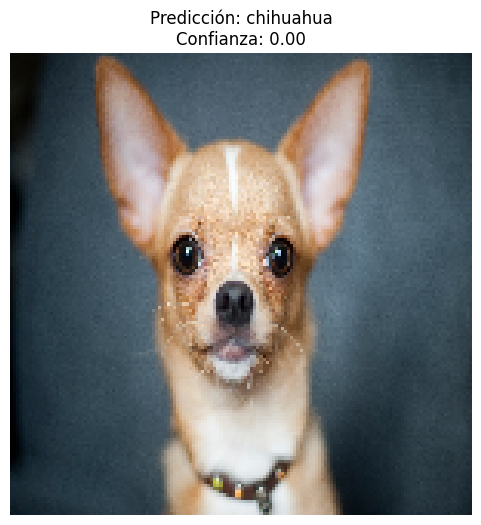

In [25]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # type: ignore
import numpy as np
import matplotlib.pyplot as plt

# Ruta de la imagen que quieres clasificar
image_path = r"C:\Entorno_Desarrollo_UDD\Machine_Learning_A_GPU\image\prueba_1.jpg"

# Dimensiones que el modelo espera
img_height, img_width = 150, 150

# Cargar y preprocesar la imagen
def preprocess_image(image_path, target_size=(img_height, img_width)):
    # Cargar la imagen
    img = load_img(image_path, target_size=target_size)
    # Convertir a array numpy
    img_array = img_to_array(img)
    # Normalizar valores de píxeles entre 0 y 1
    img_array = img_array / 255.0
    # Expandir dimensiones para simular un batch
    img_array = np.expand_dims(img_array, axis=0)
    return img, img_array

# Preprocesar la imagen
original_image, processed_image = preprocess_image(image_path)

# Realizar predicción con el modelo
prediction = transfer_learning_model.predict(processed_image)

# Ajustar nombres de clases para coincidir con las definiciones del dataset
class_names = ["chihuahua", "muffin"]  # Orden basado en train_generator.class_indices

# Determinar la clase predicha
predicted_class = class_names[int(prediction[0][0] > 0.5)]

# Mostrar el resultado junto con la imagen
plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.axis('off')
plt.title(f"Predicción: {predicted_class}\nConfianza: {prediction[0][0]:.2f}")
plt.show()
